# Decision Tree and Random Forest(1)

*** 
## iris in [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

<b>Load and return the iris dataset</b> : [for the further information about the iris dataset](https://github.com/HaeHwan/dataset/blob/master/iris/%5Biris%5D%20Loading%20and%20returning.ipynb)

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names
class_names = load_iris().target_names

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()
res = cross_val_score(clf, X, y, cv=3)
print("{0}\n평균 : {1:.3}/ 분산 : {2:.2}".format(res, res.mean(), res.var()))

[0.98039216 0.92156863 0.97916667]
평균 : 0.96/ 분산 : 0.00075


★ : 오버피팅 방지

★ <b>max_depth</b> : 몇 층까지 파고 내려갈지를 결정하는 함수  
<b>criteria</b> : “gini” for the Gini impurity and “entropy” for the information gain.  
<b>splitter</b> : “best” to choose the best split and “random” to choose the best random split.  
★ <b>min_samples_split</b> : 분개를 하기 위해 노드가 가지고 있어야하는 샘플 갯수  
<b>min_samples_leaf</b> : 마지막 노드가 가지고 있어야하는 샘플의 갯수  
<b>max_leaf_nodes</b> : 마지막 노드 갯수  

★ <b>[ccp_alpha]()</b> : Complexity parameter used for Minimal Cost-Complexity Pruning. (Greater values of ccp_alpha increase the number of nodes pruned.)
> parameter tuning 방법은 [이곳](https://github.com/HaeHwan/modeling/blob/master/Decision%20Tree/%5BDT2%5D%5Bbagging%5D%20parameter%20tuning.ipynb)에서 확인가능

***

### Visualization DT

In [3]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

In [4]:
def draw_decision_tree(model, feature_names = None, class_names = None, proportion = False):
    dot = export_graphviz(model, feature_names = feature_names, class_names = class_names, node_ids = True, proportion = proportion, filled = True)
    graph = pydot.graph_from_dot_data(dot)[0]
    image = graph.create_png()
    return Image(image)

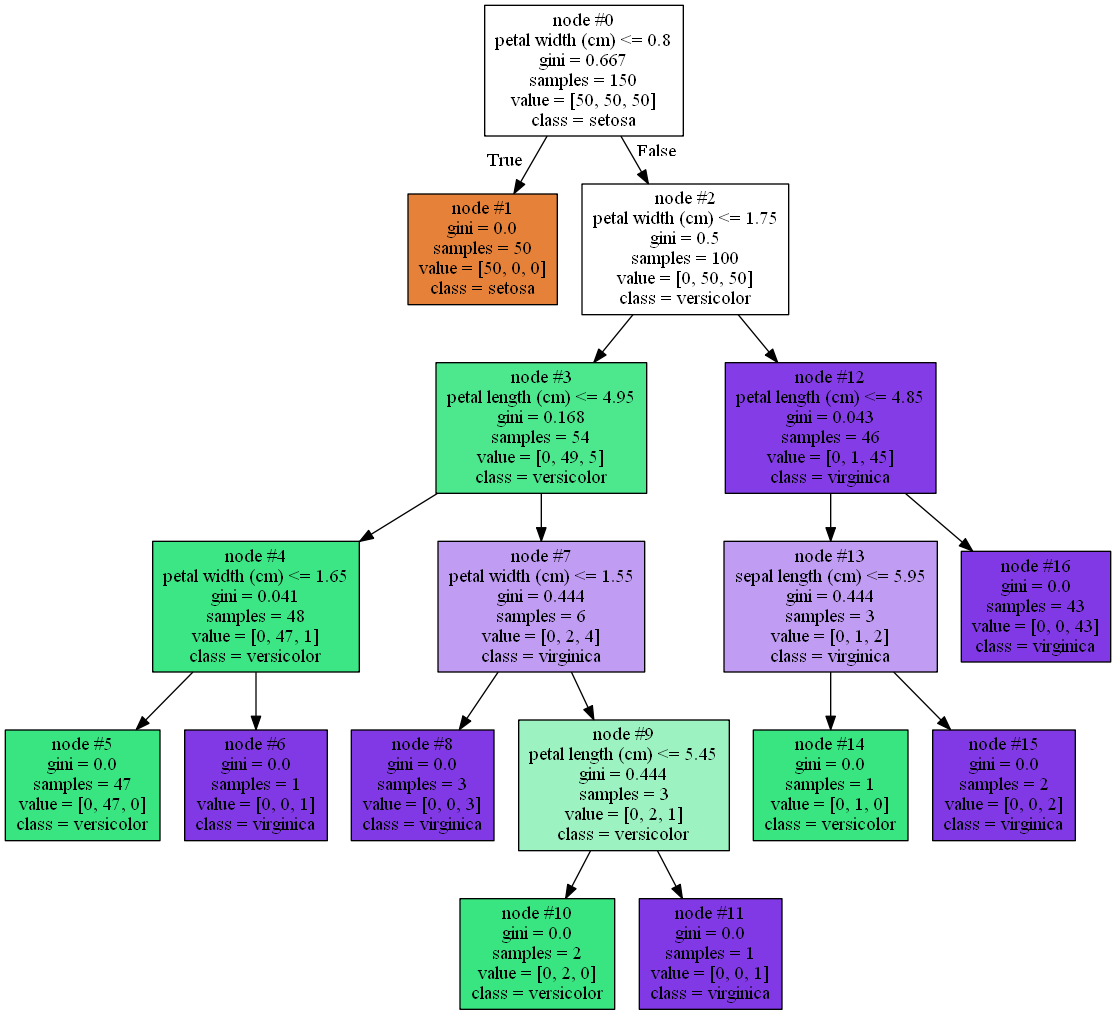

In [5]:
clf = DecisionTreeClassifier()
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

***

<b>max_depth</b> : 몇 층까지 파고 내려갈지를 결정하는 함수

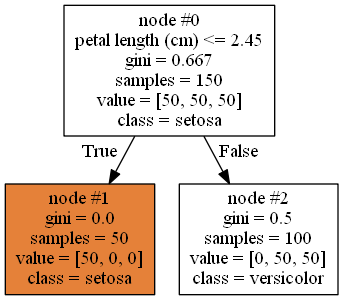

In [6]:
clf = DecisionTreeClassifier(max_depth = 1)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

***

<b>criteria</b> : “gini” for the Gini impurity and “entropy” for the information gain.

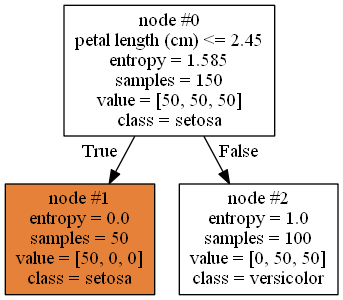

In [7]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 1)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

***

<b>splitter</b> : “best” to choose the best split and “random” to choose the best random split.

In [8]:
clf1 = DecisionTreeClassifier(splitter='random', max_depth = 1)
clf2 = DecisionTreeClassifier(splitter='random', max_depth = 1)
tree1 = clf1.fit(X, y)
tree2 = clf.fit(X, y)

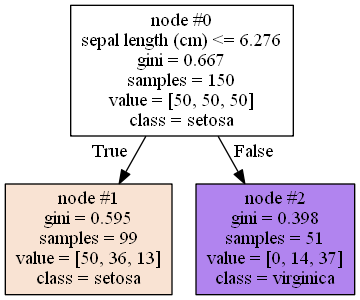

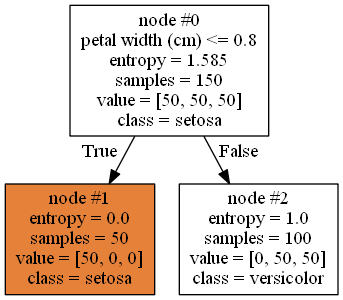

In [9]:
display(draw_decision_tree(tree1, feature_names, class_names), draw_decision_tree(tree2, feature_names, class_names))

***

<b>min_samples_split</b> : 분개를 하기 위해 노드가 가지고 있어야하는 샘플 갯수

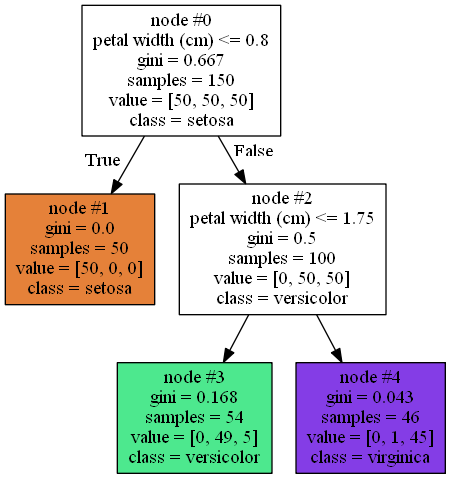

In [10]:
clf = DecisionTreeClassifier(min_samples_split = 55)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

***

<b>min_samples_leaf</b> : 마지막 노드가 가지고 있어야하는 샘플의 갯수

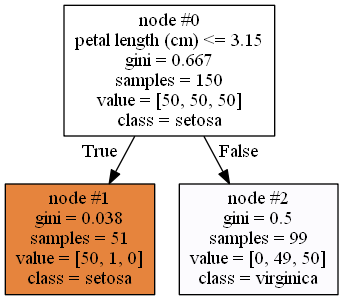

In [11]:
clf = DecisionTreeClassifier(min_samples_leaf = 51)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

***

<b>max_leaf_nodes</b> : 마지막 노드 갯수

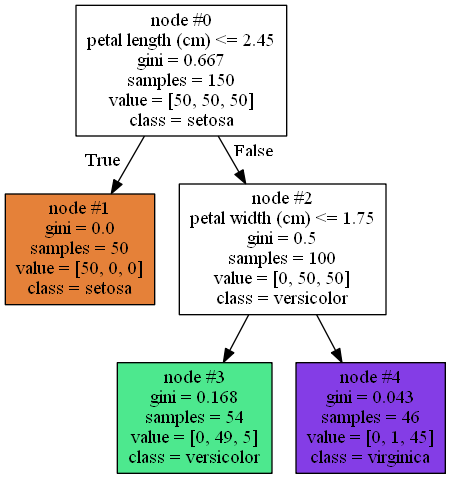

In [12]:
clf = DecisionTreeClassifier(max_leaf_nodes = 3)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

***

#### 그래프를 통해서 확인하기

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = matplotlib.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=matplotlib.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        scatter = plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], s=80, label=load_iris().target_names[idx])

    plt.xlabel(feature_names[2])
    plt.ylabel(feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    plt.grid(True)

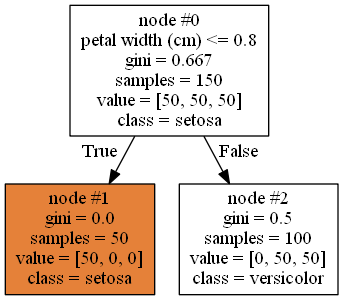

In [15]:
tree = DecisionTreeClassifier(max_depth=1).fit(X[:, 2:], y)
draw_decision_tree(tree, feature_names[2:], class_names)

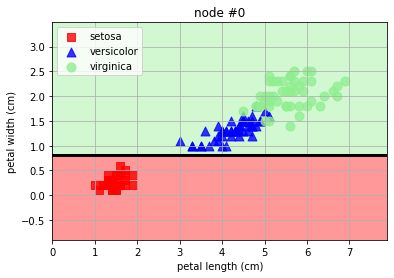

In [16]:
plot_decision_regions(X[:, 2:], y, tree, "node #0")

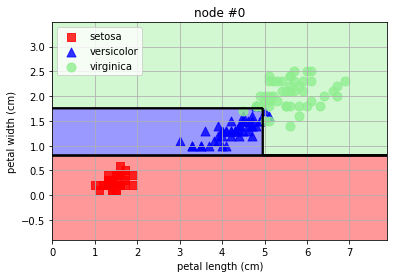

In [17]:
tree = DecisionTreeClassifier(max_depth=3).fit(X[:, 2:], y)
plot_decision_regions(X[:, 2:], y, tree, "node #0")

***

#### confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

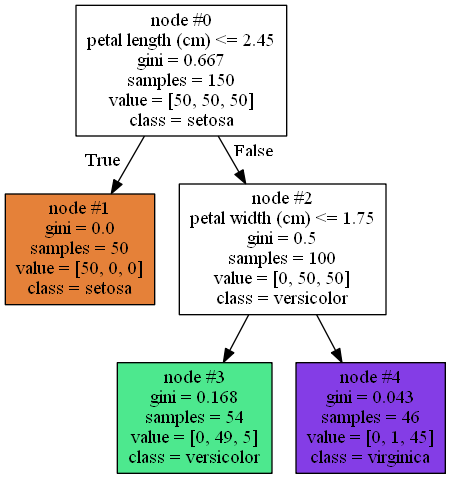

In [19]:
tree = DecisionTreeClassifier(max_depth=2).fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

In [20]:
confusion_matrix(y, tree.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

<hr>

#### 참고자료  
1. https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py